<a href="https://colab.research.google.com/github/Jeongho-Kim-kr/Python_basic/blob/main/0_%EA%B8%B0%EB%B3%B8/6_Data%20Structure%20%26%20Pythonic%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Structure & Pythonic code
## Collection
List, Tuple, Dict에 대한 Python Built-in 확장 자료 구조(모듈) <br>
편의성, 실행 효율 등을 사용자에게 제공함 <br>
아래의 모듈이 존재함

In [ ]:
from collections import deque
from collections import Counter
from collections import OrderedDict
from collections import defaultdict
from collections import namedtuple

### deque
Stack과 queue를 지원하는 모듈 <br>
List에 비해 효율적인 자료 저장 방식을 지원함

In [ ]:
deque_list = deque()
for i in range(5):
    deque_list.append(i)
    
print(deque_list)

deque([0, 1, 2, 3, 4])


In [ ]:
deque_list.appendleft(10) # 왼쪽에 append를 사용 가능
print(deque_list)

deque([10, 0, 1, 2, 3, 4])


Rotate, reverse등 Linked List의 특성을 지원함
기존 list 형태의 함수를 모두 지원함

In [ ]:
b = [3,4,5]
a = [1,2,b]
a # 연결 list

[1, 2, [3, 4, 5]]

In [ ]:
# 2원소 앞으로 이동
deque_list.rotate(2)
print(deque_list)

deque([3, 4, 10, 0, 1, 2])


In [ ]:
# 역정렬
print(deque_list)
print(deque(reversed(deque_list)))

deque([3, 4, 10, 0, 1, 2])
deque([2, 1, 0, 10, 4, 3])


In [ ]:
# 다음 리스트를 오른쪽에 추가
deque_list.extend([5,6,7])
print(deque_list)

deque([3, 4, 10, 0, 1, 2, 5, 6, 7])


## (중요) extendleft

In [ ]:
# 다음 리스트를 왼쪽에 추가(하나씩 넣어주므로 7,6,5 가 추가됨)
deque_list.extendleft([5,6,7])
print(deque_list)

deque([7, 6, 5, 3, 4, 10, 0, 1, 2, 5, 6, 7])


Deque는 기존 list보다 효율적인 자료구조를 제공 <br>
효율적 메모리 구조로 처리 속도 향상

In [ ]:
## deque의 경우
from collections import deque
import time

start_time = time.process_time()
deque_list = deque()
# Stack
for i in range(10000):
    for i in range(10000):
        deque_list.append(i)
        deque_list.pop()
print(time.process_time()-start_time, 'secomds')

8.96875 secomds


In [ ]:
## general list 경우
import time

start_time = time.process_time()
just_list = []
# Stack
for i in range(10000):
    for i in range(10000):
        just_list.append(i)
        just_list.pop()
print(time.process_time()-start_time, 'secomds')

26.140625 secomds


### defaultdict
Dict type의 값에 기본 값을 지정, 신규값 생성시 사용하는 방법

In [ ]:
# 일반 dict에서 없는 값을 호출할 경우
d = dict()
print(d['first'])

KeyError: 'first'

In [ ]:
# 일반 defaultdict에서 default값을 지정 후 없는 값을 호출할 경우
from collections import defaultdict
d = defaultdict(object) # Default dictionary를 생성
d = defaultdict(lambda:0) # Default 값을 0으로 생성함
print(d['first'])

0


In [ ]:
# ex
d = defaultdict(object) # Default dictionary를 생성
d = defaultdict(lambda:'010-0000-0000') # Default 값을 0으로 생성함
print(d['사람'])
d

010-0000-0000


defaultdict(<function __main__.<lambda>()>, {'사람': '010-0000-0000'})

### counter
Sequence type의 data element들의 개수를 dict 형태로 반환

In [ ]:
from collections import Counter
c = Counter()
c = Counter('gallahad')
print(c)

Counter({'a': 3, 'l': 2, 'g': 1, 'h': 1, 'd': 1})


Dict type, keyword parameter 등도 모두 처리 가능

In [ ]:
c = Counter({'red':4, 'blue':2})
print(c)
print(list(c.elements()))

Counter({'red': 4, 'blue': 2})
['red', 'red', 'red', 'red', 'blue', 'blue']


In [ ]:
c = Counter(cats=4, dogs=8)
print(c)
print(list(c.elements()))

Counter({'dogs': 8, 'cats': 4})
['cats', 'cats', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs']


Word counter의 기능도 손쉽게 제공함

In [ ]:
text = '''For Tito, then 60, it was the culmination of a dream he'd held since he was a young man, one he'd shelled out a cool $20 million for to make a reality.
Reflecting on the journey two decades on, Tito is gleeful when describing the moment the rocket first went into orbit.
"The pencils started floating in the air, and I could see the blackness of space and the curvature of the earth," he tells CNN Travel.
"I was euphoric. I mean, it was the greatest moment of my life, to achieve a life objective, and I knew then that nothing could ever beat this."
In the 20 years since Tito vacationed in space, only a handful of other -- uber wealthy -- tourists have followed in his footsteps, but companies such as SpaceX, Blue Origin and Virgin Galactic are banking on the next big vacation destination being out of this world, and working to make that a reality in the not-so-distant future.'''.lower().split()

print(Counter(text))
print()
print(Counter(text)['a'])

Counter({'the': 12, 'a': 7, 'of': 6, 'in': 5, 'and': 5, 'was': 4, 'to': 3, 'i': 3, 'for': 2, 'then': 2, 'it': 2, "he'd": 2, 'since': 2, 'he': 2, 'out': 2, 'make': 2, 'on': 2, 'tito': 2, 'moment': 2, 'could': 2, 'that': 2, '--': 2, 'tito,': 1, '60,': 1, 'culmination': 1, 'dream': 1, 'held': 1, 'young': 1, 'man,': 1, 'one': 1, 'shelled': 1, 'cool': 1, '$20': 1, 'million': 1, 'reality.': 1, 'reflecting': 1, 'journey': 1, 'two': 1, 'decades': 1, 'on,': 1, 'is': 1, 'gleeful': 1, 'when': 1, 'describing': 1, 'rocket': 1, 'first': 1, 'went': 1, 'into': 1, 'orbit.': 1, '"the': 1, 'pencils': 1, 'started': 1, 'floating': 1, 'air,': 1, 'see': 1, 'blackness': 1, 'space': 1, 'curvature': 1, 'earth,"': 1, 'tells': 1, 'cnn': 1, 'travel.': 1, '"i': 1, 'euphoric.': 1, 'mean,': 1, 'greatest': 1, 'my': 1, 'life,': 1, 'achieve': 1, 'life': 1, 'objective,': 1, 'knew': 1, 'nothing': 1, 'ever': 1, 'beat': 1, 'this."': 1, '20': 1, 'years': 1, 'vacationed': 1, 'space,': 1, 'only': 1, 'handful': 1, 'other': 1, '

### namedtuple
Tuple형태로 Data 구조체를 저장하는 방법 <br>
저장하는 data의 variable을 사전에 지정해서 저장함 <br>
Tuple은 인덱스를 이용해서만 variable에 접근 가능한데 namedtuple은 인덱스, 키값으로 접근 가능함

In [ ]:
from collections import namedtuple
point = namedtuple('point',['x','y'])
p = point(11, y=22)
print(p[0] + p[1])

33


In [ ]:
print(x,y)

11 22


In [ ]:
x, y = p
print(p.x + p.y)

33


In [ ]:
print(point(x=11, y=22))

point(x=11, y=22)


## lambda
함수 이름 없이, 함수처럼 쓸 수 있는 익명함수 <br>
수학의 람다 대수에서 유래함

In [ ]:
# general function
def f(x,y):
    return x + y
print(f(1,4))

5


In [ ]:
# lambda function
f = lambda x, y: x+y
print(f(1,4))

5


In [ ]:
Python3부터는 권장하지는 않으나 여전히 많이 쓰임

In [ ]:
f = lambda x: (x+3)**(x+x)
print(f(2))

625


## Map function
Sequence 자료형 각 element에 동일한 function을 적용함

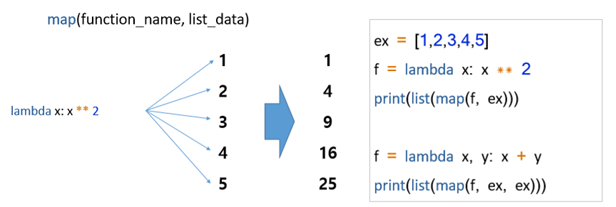

In [ ]:
ex = [1,2,3,4,5]
